# AutoARIMA in sktime (pmd.arima)

## Notes

source : https://otexts.com/fpp2/arima.html

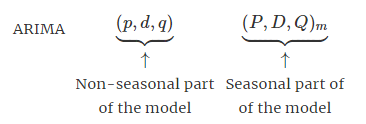

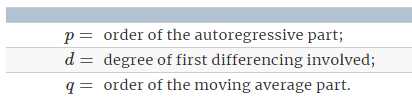

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import ReducedRegressionForecaster
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys
import matplotlib.pyplot as plt

In [3]:
from sktime.forecasting.arima import AutoARIMA

In [ ]:
from sktime.datasets import load_airline

## Basic Functionality

In [36]:
FH = 36
airlines = load_airline()
train, test = temporal_train_test_split(airlines, test_size=36)
fh = np.arange(1, FH+1)

In [37]:
forecaster = AutoARIMA(sp = 12, max_order=10)

In [38]:
forecaster.fit(train)

C:\Users\Takis\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Takis\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Takis\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Takis\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Takis\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Takis\Anaconda3\lib\site-packages\statsmodels\base\model.py:5

AutoARIMA(max_order=10, sp=12)

Text(0.5, 1.0, 'smape_loss : 0.0753')

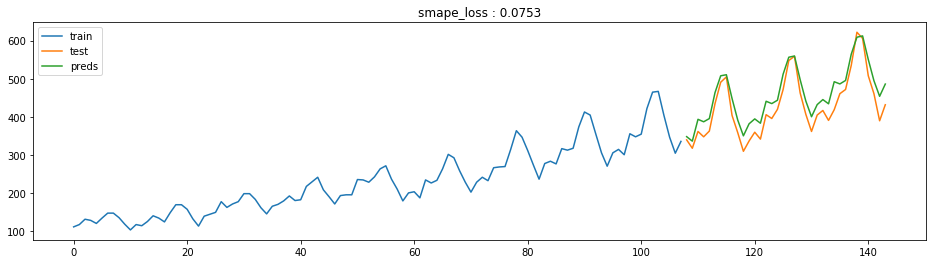

In [39]:
y_pred = forecaster.predict(fh)
smpl = smape_loss(test,y_pred)
plot_ys(train,test,y_pred,labels=['train','test','preds'])
plt.title(f'smape_loss : {round(smpl,4)}')

## Explore Fitted AutoArima object

In [40]:
dir(forecaster)

['D',
 '_X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_compute_pred_err',
 '_cutoff',
 '_detached_cutoff',
 '_fh',
 '_forecaster',
 '_get_fitted_param_names',
 '_get_param_names',
 '_get_tags',
 '_is_fitted',
 '_more_tags',
 '_predict',
 '_predict_in_sample',
 '_predict_moving_cutoff',
 '_predict_out_of_sample',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_cutoff',
 '_set_fh',
 '_set_y_X',
 '_update_predict_single',
 '_update_y_X',
 '_validate_data',
 '_y',
 'alpha',
 'check_is_fitted',
 'compute_pred_int',
 'cutoff',
 'd',
 'error_action',
 'fh',
 'fit',
 'get_fitted_params',
 'get_pa

In [41]:
forecaster.is_fitted

True

In [42]:
forecaster.get_fitted_params()

{'intercept': 0.10436163918013228,
 'ar.L1': 0.11666639154225483,
 'ar.L2': 0.5293082935415727,
 'ma.L1': -0.4802469053916456,
 'ma.L2': -0.5195925279142399,
 'sigma2': 82.40608870475943}

In [31]:
forecaster.get_params()

{'D': None,
 'alpha': 0.05,
 'd': None,
 'error_action': 'warn',
 'information_criterion': 'aic',
 'max_D': 1,
 'max_P': 2,
 'max_Q': 2,
 'max_d': 2,
 'max_order': 10,
 'max_p': 5,
 'max_q': 5,
 'maxiter': 50,
 'method': 'lbfgs',
 'n_fits': 10,
 'n_jobs': 1,
 'offset_test_args': None,
 'out_of_sample_size': 0,
 'random': False,
 'random_state': None,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal': True,
 'seasonal_test': 'ocsb',
 'seasonal_test_args': None,
 'sp': 12,
 'start_P': 1,
 'start_Q': 1,
 'start_p': 2,
 'start_params': None,
 'start_q': 2,
 'stationary': False,
 'stepwise': True,
 'suppress_warnings': False,
 'test': 'kpss',
 'trace': False,
 'trend': None,
 'with_intercept': True}

## Run more extensive AutoARIMA

In [43]:
params = {
            'D': None,
            'alpha': 0.05,
            'd': None,
            'error_action': 'warn',
            'information_criterion': 'aic',
            'max_D': 2,
            'max_P': 6,
            'max_Q': 6,
            'max_d': 2,
            'max_order': 10,
            'max_p': 6,
            'max_q': 6,
            'maxiter': 100,
            'method': 'lbfgs',
            'n_fits': 10,
            'n_jobs': -1,
            'offset_test_args': None,
            'out_of_sample_size': 0,
            'random': False,
            'random_state': None,
            'scoring': 'mse',
            'scoring_args': None,
            'seasonal': True,
            'seasonal_test': 'ocsb',
            'seasonal_test_args': None,
            'sp': 12,
            'start_P': 1,
            'start_Q': 1,
            'start_p': 2,
            'start_params': None,
            'start_q': 2,
            'stationary': False,
            'stepwise': True,
            'suppress_warnings': False,
            'test': 'kpss',
            'trace': False,
            'trend': None,
            'with_intercept': True
            }

In [44]:
ext_forecaster = AutoARIMA(**params)

In [45]:
ext_forecaster.fit(train)

AutoARIMA(max_D=2, max_P=6, max_Q=6, max_order=10, max_p=6, max_q=6,
          maxiter=100, n_jobs=-1, sp=12)

Text(0.5, 1.0, 'smape_loss : 0.0753')

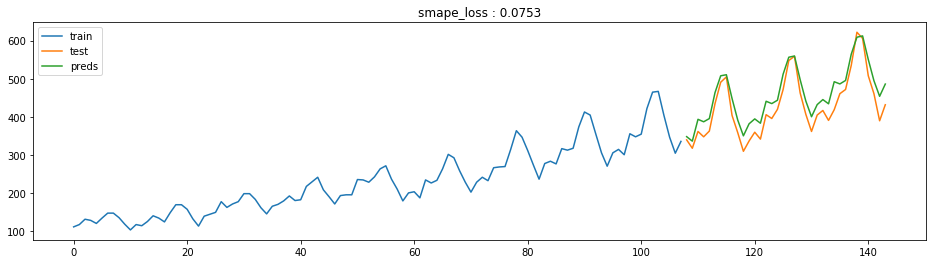

In [46]:
y_pred = ext_forecaster.predict(fh)
smpl = smape_loss(test,y_pred)
plot_ys(train,test,y_pred,labels=['train','test','preds'])
plt.title(f'smape_loss : {round(smpl,4)}')

In [47]:
ext_forecaster.get_fitted_params()

{'intercept': 0.10436163918013228,
 'ar.L1': 0.11666639154225483,
 'ar.L2': 0.5293082935415727,
 'ma.L1': -0.4802469053916456,
 'ma.L2': -0.5195925279142399,
 'sigma2': 82.40608870475943}